In [1]:
cd /home/jupyter/kubeflow-pipeline-demo/customer_churn_analysis

/home/jupyter/kubeflow-pipeline-demo/customer_churn_analysis


In [20]:
#!pip install -r requirements.txt

In [34]:
#!git clone https://github.com/datasciencechampion/customer_churn_analysis.git

In [ ]:
#gs_bucket_name="churn-prediction-demo"
#Bucket_uri="gs://churn-prediction-demo"
#version=1
#store_artifacts=Bucket_uri + "/" + str(version)
#sample_data_path=Bucket_uri + "/" + "data/sample_churn_data.csv"
#processed_data_path=Bucket_uri + "/" + "processed/processed_churn_data.csv"

In [2]:
cat global_config.py

gs_bucket_name="churn-prediction-demo"
Bucket_uri="gs://churn-prediction-demo"
version=1
store_artifacts=Bucket_uri + "/" + str(version)
sample_data_path=Bucket_uri + "/" + "data/sample_churn_data.csv"
processed_data_path = Bucket_uri + "/" + "processed/processed_churn_data.csv"


In [2]:
!python global_config.py

In [4]:
import global_config
print (global_config.sample_data_path)
print (global_config.processed_data_path)

gs://churn-prediction-demo/data/sample_churn_data.csv
gs://churn-prediction-demo/processed/processed_churn_data.csv


gs://churn-prediction-demo/data/sample_churn_data.csv


AttributeError: module 'config' has no attribute 'processed_data_path'

In [48]:
!python get_sample_data.py

Loading samples into Cloud storage bucket : gs://churn-prediction-demo
Churn sample data loaded into Cloud storage bucket : gs://churn-prediction-demo


In [1]:
cd /home/jupyter//kubeflow-pipeline-demo/customer_churn_analysis

/home/jupyter/kubeflow-pipeline-demo/customer_churn_analysis


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#data Cleaning
#the TotalCharges is the amount charged to the customer, hence this should be numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# SeniorCitizen should be a qualitative column and not numeric, hence converting it into a object type
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [6]:
#Fill null values
df['TotalCharges'].fillna(value=df['tenure'] * df['MonthlyCharges'], inplace=True)

In [7]:
#convert churn class to numeric
def churn_to_numeric(value):
    if value.lower() == 'yes':
        return 1
    return 0
df['Churn'] = df['Churn'].apply(churn_to_numeric)

In [8]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
print("Data preprocessing done Sucessfully")

df.to_csv("processed_data.csv")
from google.cloud import storage
storage_client = storage.Client()
bucket = storage_client.bucket(config.gs_bucket_name)
bucket.blob('processed/processed_churn_data.csv').upload_from_filename('processed_data.csv', content_type='text/csv')
print("Processed Churn data loaded Sucessfully into Cloud storage bucket : gs://churn-prediction-demo")

Data preprocessing done Sucessfully
Processed Churn data loaded Sucessfully into Cloud storage bucket : gs://churn-prediction-demo


In [3]:
!python global_config.py

python: can't open file 'global_config.py': [Errno 2] No such file or directory


In [7]:
!python train_evaluate_model.py

Train & Test Split Successfully comppleted
Feature engineering started
Feature engineering completed


Traning started
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.

In [32]:
print (config.processed_data_path)
print (config.sample_data_path)

AttributeError: module 'config' has no attribute 'processed_data_path'

In [2]:
!python preprocess_data.py

python: can't open file 'preprocess_data.py': [Errno 2] No such file or directory


In [64]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import global_config

In [65]:

df = pd.read_csv(global_config.processed_data_path)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [66]:
#Prediction
# Creating two data frames : X => contains independent variables, y => contains dependent variable
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 1093 to 19
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2113 non-null   int64  
 1   gender            2113 non-null   object 
 2   SeniorCitizen     2113 non-null   object 
 3   Partner           2113 non-null   object 
 4   Dependents        2113 non-null   object 
 5   tenure            2113 non-null   int64  
 6   PhoneService      2113 non-null   object 
 7   MultipleLines     2113 non-null   object 
 8   InternetService   2113 non-null   object 
 9   OnlineSecurity    2113 non-null   object 
 10  OnlineBackup      2113 non-null   object 
 11  DeviceProtection  2113 non-null   object 
 12  TechSupport       2113 non-null   object 
 13  StreamingTV       2113 non-null   object 
 14  StreamingMovies   2113 non-null   object 
 15  Contract          2113 non-null   object 
 16  PaperlessBilling  2113 non-null   object 

In [35]:
import tensorflow as tf

In [69]:
#feature extraction - numerical
tenure = tf.feature_column.numeric_column('tenure')
monthly_charges = tf.feature_column.numeric_column('MonthlyCharges')
total_charges = tf.feature_column.numeric_column('TotalCharges')

In [70]:
# feature extraction - categorical
col_unique_val_counts = []
cat_columns = []
for col in X.columns:
    if X[col].dtype.name != 'object':
        continue
    unique_vals = X[col].unique()
    col_unique_val_counts.append(len(unique_vals))
    cat_columns.append(col)
    print(col, "->",unique_vals)

gender -> ['Female' 'Male']
SeniorCitizen -> ['No' 'Yes']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
OnlineBackup -> ['Yes' 'No' 'No internet service']
DeviceProtection -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
StreamingMovies -> ['No' 'Yes' 'No internet service']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [71]:
cat_cols = [tf.feature_column.categorical_column_with_hash_bucket(col, hash_bucket_size=size) 
            for col, size in zip(cat_columns, col_unique_val_counts)]

In [72]:
num_cols = [tenure, monthly_charges, total_charges]
feature_columns = num_cols + cat_cols

In [73]:
#Linear Classifier model
#We are making use of TensorFlow because we are going to use Neural Networks to classify churn..
n_classes = 2 # churn Yes or No
batch_size = 100

In [74]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train, 
    y=y_train, 
    batch_size=batch_size,
    num_epochs=1000, 
    shuffle=True)

In [75]:
linear_model= tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=n_classes)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbusgobaq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [76]:
linear_model.train(input_fn=input_func, steps=10000) # uinsg 10k steps

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbusgobaq/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO

In [77]:
#model evaluation
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=batch_size,
      num_epochs=1,
      shuffle=False)

In [78]:
results=linear_model.evaluate(eval_input_func)
model_accuracy=results['accuracy']
model_precision=results['precision']
model_loss=results['loss']
model_recall=results['recall']
print('Accuracy: %s' % model_accuracy) 
print('Precision: %s' % model_precision) 
print('Loss: %s' % model_loss) 
  

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-08-03T13:02:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbusgobaq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 3.07145s
INFO:tensorflow:Finished evaluation at 2021-08-03-13:02:54
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8069096, accur

In [79]:
# Now print to file
import json
with tf.io.gfile.GFile(global_config.store_artifacts + "/metrics.json", 'w') as outfile:
        json.dump({ "Accuracy": str(model_accuracy), "Precision": str(model_precision), "Loss":str(model_loss)}, outfile)

In [80]:
#making predictions
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=batch_size,
      num_epochs=1,
      shuffle=False)

In [81]:
preds = linear_model.predict(pred_input_func)

In [82]:
predictions = [p['class_ids'][0] for p in preds]

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbusgobaq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [83]:
from sklearn.metrics import classification_report

In [84]:
target_names = ['No', 'Yes']

In [85]:
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1546
         Yes       0.68      0.53      0.59       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [86]:
res=tf.math.confusion_matrix(y_test,predictions).numpy()
# Printing the result
print('Confusion_matrix: ',res)

Confusion_matrix:  [[1406  140]
 [ 268  299]]


In [87]:
vocab = list(df['Churn'].unique())
print('Vocab :',vocab)

Vocab : [0, 1]


In [55]:
#cm = confusion_matrix(y, yhat, labels=vocab)
import os
from tensorflow.python.lib.io import file_io 
import json
data = []
for target_index, target_row in enumerate(res):
    for predicted_index, count in enumerate(target_row):
        data.append((vocab[target_index], vocab[predicted_index], count))

df_cm = pd.DataFrame(data, columns=['target', 'predicted', 'count'])
cm_file = os.path.join(global_config.store_artifacts, 'confusion_matrix.csv')
with file_io.FileIO(cm_file, 'w') as f:
    df_cm.to_csv(f, columns=['target', 'predicted', 'count'], header=False, index=False)

metadata = {
    'outputs' : [{
      'type': 'confusion_matrix',
      'format': 'csv',
      'schema': [
        {"name": "target", "type": "CATEGORY"},
        {"name": "predicted", "type": "CATEGORY"},
        {"name": "count", "type": "NUMBER"},
      ],
      'source': cm_file,
      # Convert vocab to string because for bealean values we want "True|False" to match csv data.
      'labels': list(map(str, vocab)),
    }
    ]
  }


#with file_io.FileIO('/mlpipeline-ui-metadata.json', 'w') as f:
with file_io.FileIO('/home/jupyter/kubeflow-pipeline-demo/customer_churn_analysis/mlpipeline-ui-metadata.json', 'w') as f:
    json.dump(metadata, f)


In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,predictions)

In [89]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

In [90]:
print('FPR: ',fpr)
print('TPR: ',tpr)
print('threshold: ',thresholds)


FPR:  [0.         0.09055627 1.        ]
TPR:  [0.         0.52733686 1.        ]
threshold:  [2 1 0]


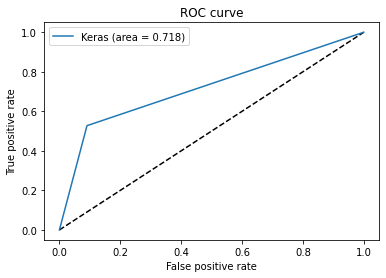

In [92]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

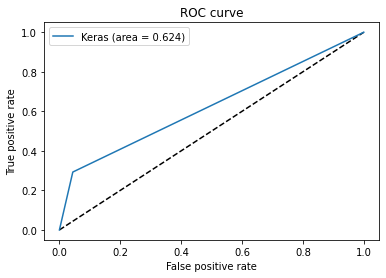

In [63]:
import matplotlib.pyplot as plt 
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
def roc_vis(roc_csv_file_path: str, mlpipeline_ui_metadata_path: kfp.components.OutputPath()):
  import json

  df_roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
  roc_file = os.path.join(roc_csv_file_path, 'roc.csv')
  with file_io.FileIO(roc_file, 'w') as f:
    df_roc.to_csv(f, columns=['fpr', 'tpr', 'thresholds'], header=False, index=False)

  metadata = {
    'outputs': [{
      'type': 'roc',
      'format': 'csv',
      'schema': [
        {'name': 'fpr', 'type': 'NUMBER'},
        {'name': 'tpr', 'type': 'NUMBER'},
        {'name': 'thresholds', 'type': 'NUMBER'},
      ],
      'source': roc_file
    }]
  }

  with open(mlpipeline_ui_metadata_path, 'w') as metadata_file:
    json.dump(metadata, metadata_file)

In [45]:
'''
model_accuracy=results['accuracy']
model_precision=results['precision']
model_loss=results['loss']
model_recall=results['recall']
'''

metrics = {
    'metrics': [{
      'name': 'Accuracy',
      'numberValue':  str(model_accuracy),
      'format': "PERCENTAGE",
    }, 
    {
      'name': 'Precision',
      'numberValue':  str(model_precision),
      'format': "PERCENTAGE",
    }, 
    {
      'name': 'Loss',
      'numberValue':  str(model_loss),
      'format': "PERCENTAGE",
    },
    {
      'name': 'Recall',
      'numberValue':  str(model_recall),
      'format': "PERCENTAGE",
    } ,]
  }
with file_io.FileIO('/home/jupyter/kubeflow-pipeline-demo/customer_churn_analysis/mlpipeline-metrics.json', 'w') as f:
    json.dump(metrics, f)

In [46]:
!python train_evaluate_model.py

Train & Test Split Successfully comppleted
Feature engineering started
Feature engineering completed


Traning started
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.

In [47]:
!pip freeze > requirements.txt